In [123]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [124]:
df=pd.read_csv('airbnb_listings.csv',encoding='latin-1')

In [125]:
df.head()

host_id host_name      city state     zipcode        country   latitude  \
0   5867023   Michael  New York    NY  10022-4175  United States  40.756852   
1   2631556    Denise  New York    NY         NaN  United States  40.830599   
2   4601412      Miao  Brooklyn    NY       11221  United States  40.692189   
3    198425      Sara  New York    NY       10011  United States  40.734751   
4  22590025   Charles  New York    NY       10011  United States  40.745282   

   longitude property_type        room_type  ...  beds  bed_type  square_feet  \
0 -73.964754     Apartment  Entire home/apt  ...   1.0  Real Bed          NaN   
1 -73.941014     Apartment  Entire home/apt  ...   3.0  Real Bed          NaN   
2 -73.924120     Apartment     Private room  ...   2.0  Real Bed          NaN   
3 -74.002592     Apartment  Entire home/apt  ...   1.0  Real Bed          NaN   
4 -73.997836     Apartment  Entire home/apt  ...   2.0  Real Bed          NaN   

      price availability_365  number_of_reviews review_scores_rating  \
0  $160.00               322                 62                 86.0   
1  $105.00               348                 22                 85.0   
2   $58.00               227                 35                 98.0   
3  $185.00               274                 26                 96.0   
4  $195.00               365                  1                100.0   

   review_scores_cleanliness  review_scores_location  review_scores_value  
0                        7.0                    10.0                  9.0  
1                        8.0                     7.0                  8.0  
2                       10.0                     9.0                 10.0  
3                        9.0                    10.0                  9.0  
4                       10.0                    10.0                 10.0  

[5 rows x 23 columns]

In [127]:
#a. Observations on shape of data and data types of all attributes
df.shape

(27392, 23)

In [128]:
#b. Check for missing value
df.isnull().sum()

host_id                          0
host_name                        0
city                             0
state                            2
zipcode                        162
country                          1
latitude                         0
longitude                        0
property_type                    6
room_type                        0
accommodates                     0
bathrooms                      463
bedrooms                       140
beds                            98
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64

In [129]:
#c. Display the statistical summary
df.describe()

host_id      latitude     longitude  accommodates     bathrooms  \
count  2.739200e+04  27392.000000  27392.000000  27392.000000  26929.000000   
mean   8.518927e+06     40.733070    -73.964276      2.892779      1.116287   
std    7.510027e+06      0.048968      0.035162      1.755137      0.369832   
min    2.830000e+02     40.509611    -74.239539      1.000000      0.000000   
25%    2.104498e+06     40.699655    -73.988449      2.000000      1.000000   
50%    6.119374e+06     40.728024    -73.966075      2.000000      1.000000   
75%    1.392422e+07     40.764030    -73.947260      4.000000      1.000000   
max    2.546867e+07     40.907704    -73.726710     16.000000      8.000000   

           bedrooms          beds   square_feet  availability_365  \
count  27252.000000  27294.000000   1006.000000      27392.000000   
mean       1.135660      1.531289    720.210736        262.919210   
std        0.667599      1.098971    652.795558        125.668249   
min        0.000000      1.000000      0.000000          0.000000   
25%        1.000000      1.000000    371.250000        177.000000   
50%        1.000000      1.000000    650.000000        333.000000   
75%        1.000000      2.000000    913.250000        363.000000   
max       10.000000     16.000000  12000.000000        365.000000   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
count       27392.000000          18735.000000               18661.000000   
mean           10.130221             92.218895                   9.011093   
std            18.665400              8.336264                   1.163870   
min             0.000000             20.000000                   2.000000   
25%             0.000000             89.000000                   8.000000   
50%             3.000000             94.000000                   9.000000   
75%            11.000000             99.000000                  10.000000   
max           221.000000            100.000000                  10.000000   

       review_scores_location  review_scores_value  
count            18660.000000         18658.000000  
mean                 9.248660             9.125737  
std                  0.973474             0.906612  
min                  2.000000             2.000000  
25%                  9.000000             9.000000  
50%                 10.000000             9.000000  
75%                 10.000000            10.000000  
max                 10.000000            10.000000

In [130]:
#d. Univariate Analysis and Bivariate Analysis of all the attributes
df_num = df.select_dtypes(include=['float','int'])
df_num.columns

Index(['host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'availability_365',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

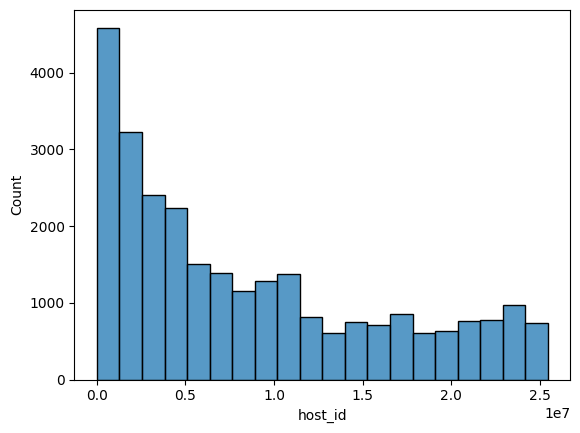

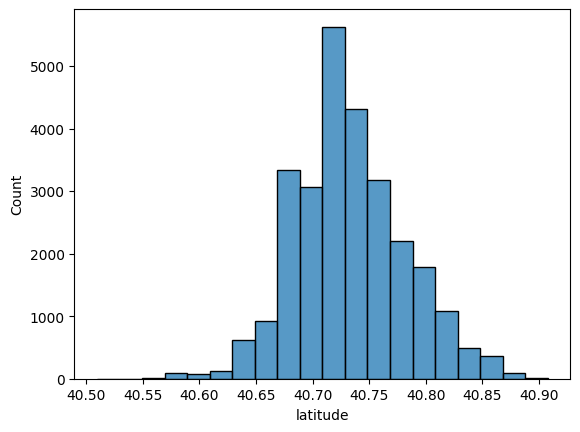

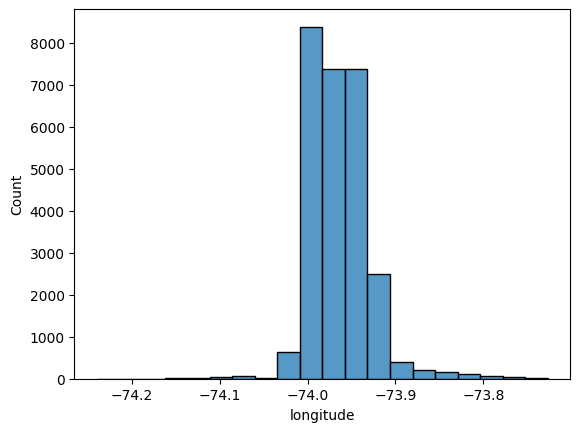

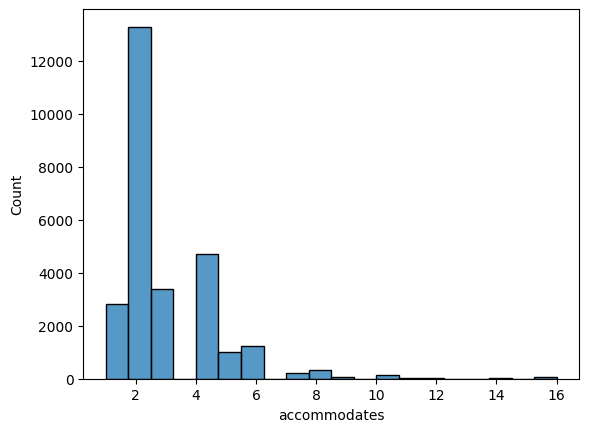

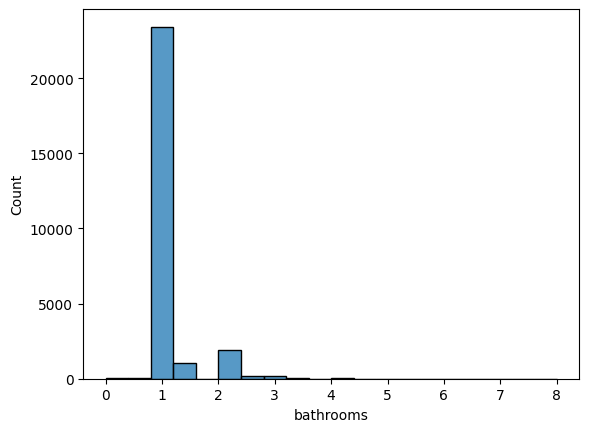

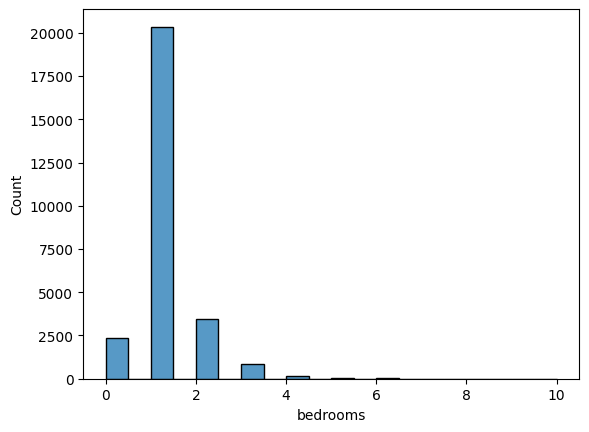

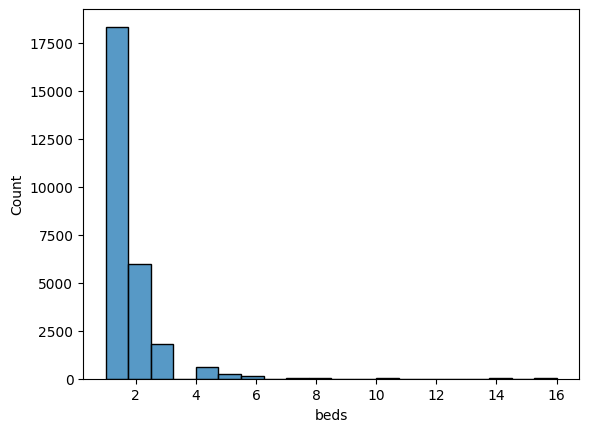

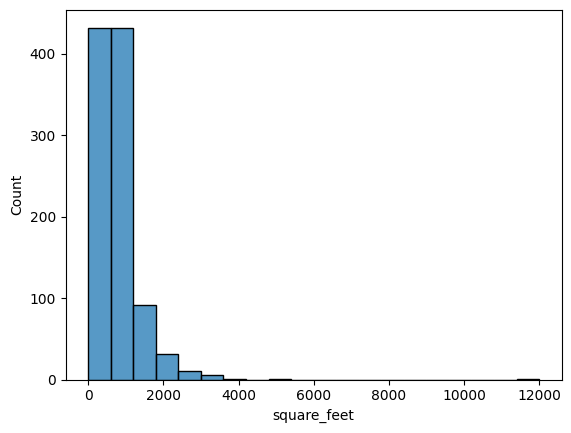

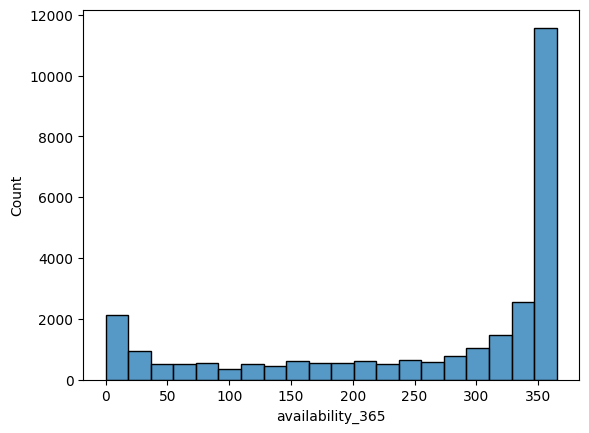

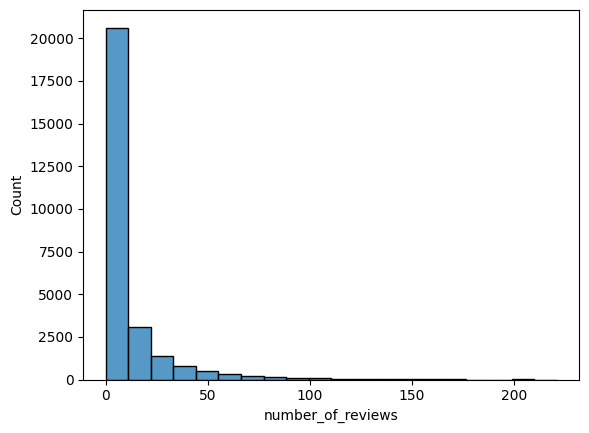

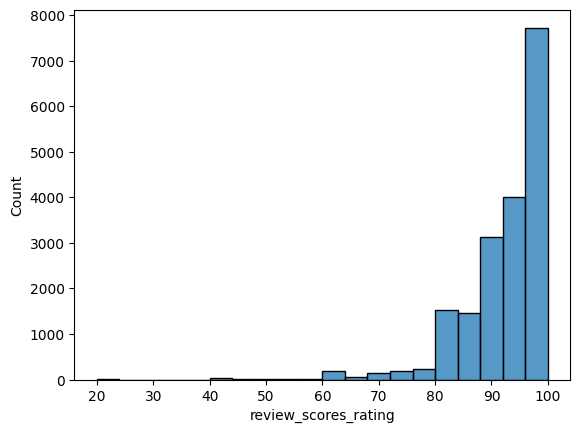

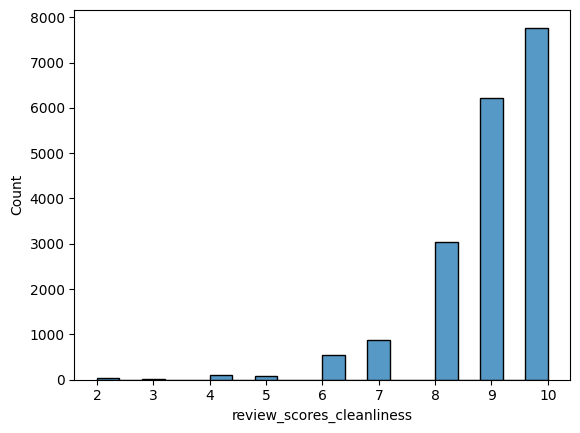

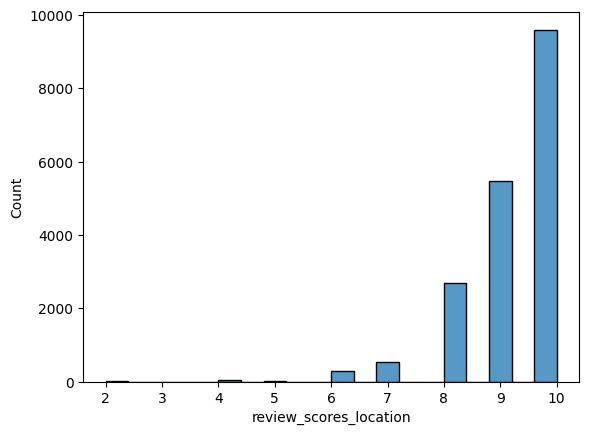

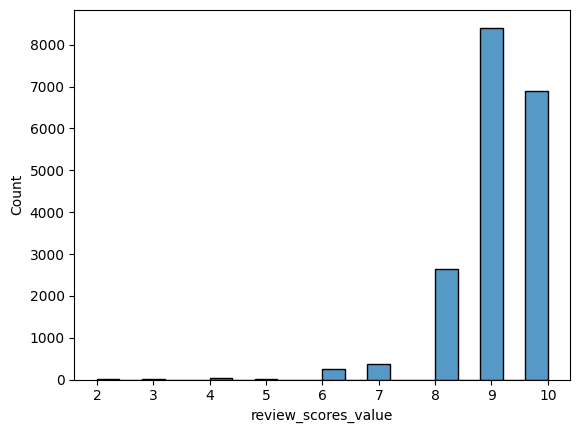

In [131]:
for i in df_num:
    sns.histplot(x=df_num[i], bins=20)
    plt.show()

In [132]:
#Bivariate Analysis 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['new_price']=label_encoder.fit_transform(df['price'])
reshaped_category=df['new_price'].values.reshape(-1,1)

In [133]:
from sklearn.preprocessing import KBinsDiscretizer
kbd=KBinsDiscretizer(n_bins=20,encode="ordinal",strategy="uniform")
binned_data=kbd.fit_transform(reshaped_category)

In [134]:
df['price_binned']=binned_data
df['price_binned']

0         3.0
1         1.0
2        15.0
3         4.0
4         5.0
         ... 
27387     2.0
27388     2.0
27389    19.0
27390    15.0
27391     1.0
Name: price_binned, Length: 27392, dtype: float64

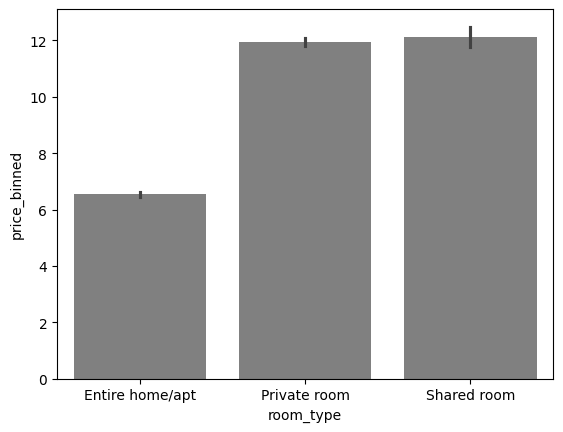

In [135]:
sns.barplot(x=df['room_type'],y=df['price_binned'],color='gray')
plt.show()

<Axes: xlabel='state', ylabel='price_binned'>

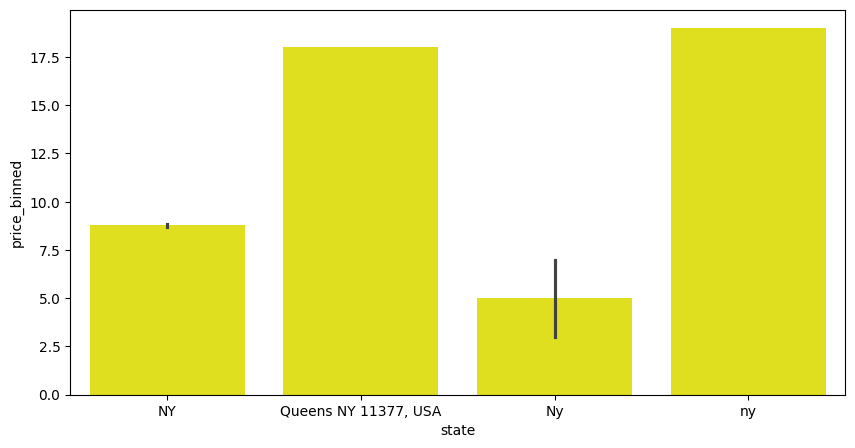

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['state'],y=df['price_binned'],color='yellow')

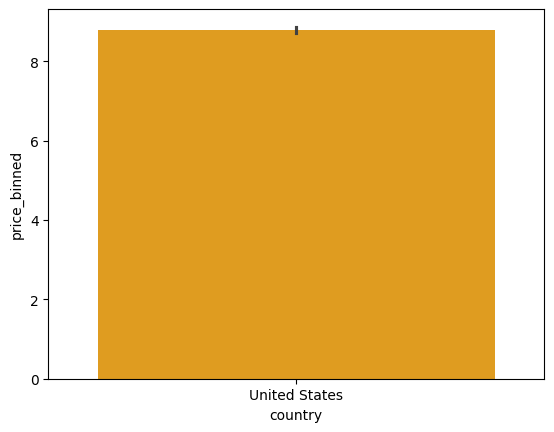

In [137]:
sns.barplot(x=df['country'],y=df['price_binned'],color='orange')
plt.show()

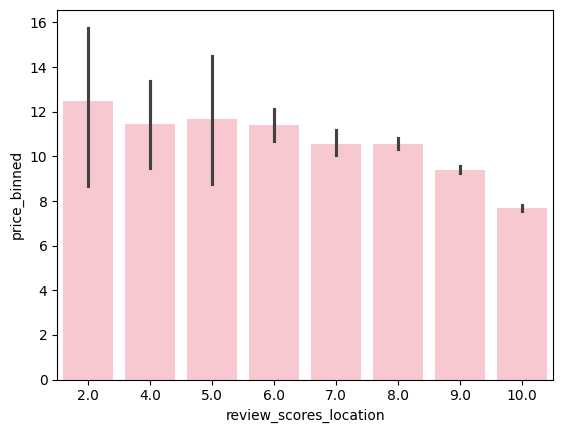

In [138]:
sns.barplot(x=df['review_scores_location'],y=df['price_binned'],color='pink')
plt.show()

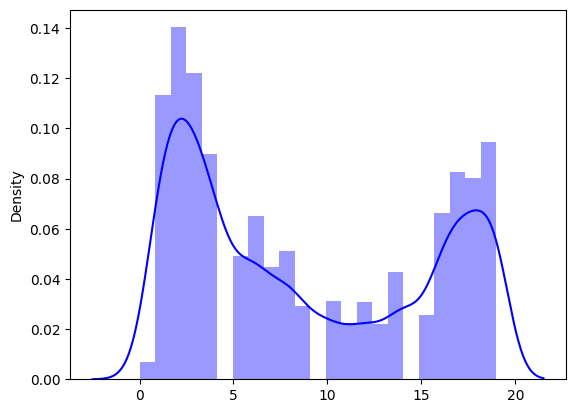

In [139]:
sns.distplot(x=df['price_binned'],color='blue')
plt.show()

#Comments:
#a. On range of attributes
The dataset shows usa diverse range of attributes,
including categorical variables like city, state, property_type, and
room_type, and numerical variables such as price, square_feet,
number_of_reviews, and various review scores.


#b. Outliers of various attributes

outliers exist in many columns such as  attributes like price, square_feet, and
number_of_reviews, which can significantly impact the data distribution 
and subsequent analyses.

#c. On the distribution of the variables and relationship between them


The distribution of variables is likely to be skewed for several attributes, such as price and number_of_reviews. Relationships between variables are expected, such as a positive correlation between price and square_feet, and potential correlations between price and review scores.


In [140]:
#3. Data Preprocessing
#a. Duplicate value check
df.duplicated().sum()

np.int64(0)

In [141]:
#b. Missing value treatment
df.isnull().sum()


host_id                          0
host_name                        0
city                             0
state                            2
zipcode                        162
country                          1
latitude                         0
longitude                        0
property_type                    6
room_type                        0
accommodates                     0
bathrooms                      463
bedrooms                       140
beds                            98
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
new_price                        0
price_binned                     0
dtype: int64

In [142]:
cat_col=df.select_dtypes(include='object')
for i in cat_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [143]:
df_num = df.select_dtypes(include=['float','int'])
for a in df_num:
        df[a].fillna(df[a].mean(),inplace=True)


In [144]:
df.isnull().sum()

host_id                      0
host_name                    0
city                         0
state                        0
zipcode                      0
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
square_feet                  0
price                        0
availability_365             0
number_of_reviews            0
review_scores_rating         0
review_scores_cleanliness    0
review_scores_location       0
review_scores_value          0
new_price                    0
price_binned                 0
dtype: int64

In [145]:
#c. Outlier treatment
def outlier(data,columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound= Q1-threshold* IQR
        upper_bound= Q3+threshold* IQR
        data[i]=data[i].clip(lower=lower_bound,upper=upper_bound)

In [146]:
outlier(df,df_num)

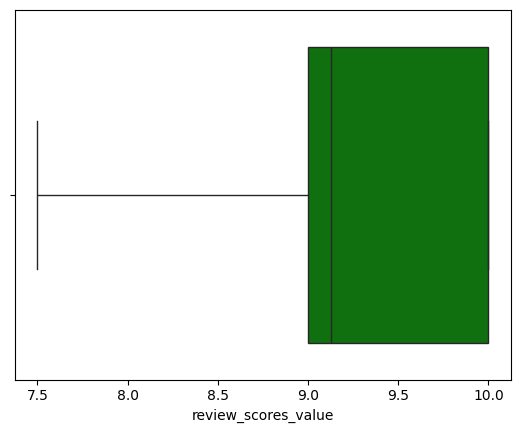

In [147]:
sns.boxplot(x=df['review_scores_value'],color='green')
plt.show()

In [148]:
#d. Feature Engineering

#Feature Engineering ka matlab hota hai raw data ko process karke 
#naye features create karna ya existing features ko modify karna, 
#jo machine learning model ke liye zyada useful ho.






df_num=df.drop(['zipcode','host_id','host_name'],axis=1)

In [149]:
df_num

city state        country   latitude  longitude  \
0            New York    NY  United States  40.756852 -73.964754   
1            New York    NY  United States  40.830599 -73.941014   
2            Brooklyn    NY  United States  40.692189 -73.924120   
3            New York    NY  United States  40.734751 -74.002592   
4            New York    NY  United States  40.745282 -73.997836   
...               ...   ...            ...        ...        ...   
27387        New York    NY  United States  40.742363 -73.981968   
27388        New York    NY  United States  40.759642 -73.985343   
27389  Staten Island     NY  United States  40.645741 -74.050232   
27390        Brooklyn    NY  United States  40.669931 -73.946820   
27391        New York    NY  United States  40.753941 -73.993232   

      property_type        room_type  accommodates  bathrooms  bedrooms  ...  \
0         Apartment  Entire home/apt             2        1.0       1.0  ...   
1         Apartment  Entire home/apt             7        1.0       1.0  ...   
2         Apartment     Private room             2        1.0       1.0  ...   
3         Apartment  Entire home/apt             2        1.0       1.0  ...   
4         Apartment  Entire home/apt             2        1.0       1.0  ...   
...             ...              ...           ...        ...       ...  ...   
27387     Apartment  Entire home/apt             2        1.0       1.0  ...   
27388     Apartment     Private room             2        1.0       1.0  ...   
27389         House  Entire home/apt             6        1.0       1.0  ...   
27390     Apartment  Entire home/apt             3        1.0       1.0  ...   
27391     Apartment      Shared room             1        1.0       1.0  ...   

       square_feet     price  availability_365 number_of_reviews  \
0       720.210736  $160.00                322              27.5   
1       720.210736  $105.00                348              22.0   
2       720.210736   $58.00                227              27.5   
3       720.210736  $185.00                274              26.0   
4       720.210736  $195.00                365               1.0   
...            ...       ...               ...               ...   
27387   720.210736  $130.00                365               3.0   
27388   720.210736  $139.00                332              27.5   
27389   720.210736   $99.00                357               2.0   
27390   720.210736   $55.00                 93               3.0   
27391   720.210736  $110.00                362               4.0   

       review_scores_rating  review_scores_cleanliness  \
0                      86.0                        7.5   
1                      85.0                        8.0   
2                      98.0                       10.0   
3                      96.0                        9.0   
4                     100.0                       10.0   
...                     ...                        ...   
27387                  98.0                        9.0   
27388                  95.0                        9.0   
27389                  90.0                        9.0   
27390                 100.0                       10.0   
27391                  90.0                        9.0   

       review_scores_location  review_scores_value  new_price  price_binned  
0                        10.0                  9.0         86           3.0  
1                         7.5                  8.0         32           1.0  
2                         9.0                 10.0        360          15.0  
3                        10.0                  9.0        112           4.0  
4                        10.0                 10.0        122           5.0  
...                       ...                  ...        ...           ...  
27387                    10.0                  9.0         57           2.0  
27388                    10.0                  9.0         66           2.0  
27389                  

In [150]:
# Clean the price column (removes the '$' and converts it to float)
df['price'] = df['price'].str.replace(r'[^\d.]','',regex=True).astype(float)


In [151]:
# 1. Price per Person (price divided by accommodates)
df['price_per_person'] = df['price'] / df['accommodates']

# 2. Price per Square Foot (price divided by square feet)
df['price_per_sqft'] = df['price'] / df['square_feet']

# 3. Average Review Score (average of review scores)
df['average_review_score'] = df[['review_scores_rating', 'review_scores_cleanliness', 
                                  'review_scores_location', 'review_scores_value']].mean(axis=1)

# 4. Availability Rate (availability_365 divided by 365)
df['availability_rate'] = df['availability_365'] / 365


In [152]:
#e. Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    df[i] = label_encoder.fit_transform(df[i])
df.head()


host_id  host_name  city  state  zipcode  country   latitude  longitude  \
0   5867023       4615   104      0       22        0  40.756852 -73.964754   
1   2631556       1676   104      0      107        0  40.830599 -73.941014   
2   4601412       4608    32      0      117        0  40.692189 -73.924120   
3    198425       5967   104      0       12        0  40.734751 -74.002592   
4  22590025       1234   104      0       12        0  40.745282 -73.997836   

   property_type  room_type  ...  review_scores_rating  \
0              0          0  ...                  86.0   
1              0          0  ...                  85.0   
2              0          1  ...                  98.0   
3              0          0  ...                  96.0   
4              0          0  ...                 100.0   

   review_scores_cleanliness  review_scores_location  review_scores_value  \
0                        7.5                    10.0                  9.0   
1                        8.0                     7.5                  8.0   
2                       10.0                     9.0                 10.0   
3                        9.0                    10.0                  9.0   
4                       10.0                    10.0                 10.0   

   new_price  price_binned  price_per_person  price_per_sqft  \
0         86           3.0              80.0        0.222157   
1         32           1.0              15.0        0.145791   
2        360          15.0              29.0        0.080532   
3        112           4.0              92.5        0.256869   
4        122           5.0              97.5        0.270754   

   average_review_score  availability_rate  
0                28.125           0.882192  
1                27.125           0.953425  
2                31.750           0.621918  
3                31.000           0.750685  
4                32.500           1.000000  

[5 rows x 29 columns]

In [73]:
#f. Scaling
X=df.drop('price',axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [74]:
x_train.shape, y_train.shape

((21913, 28), (21913,))

In [75]:
x_test.shape ,y_test.shape

((5479, 28), (5479,))

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [77]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [78]:
#3. Model building with hyperparameter tuning (30 Points)
#a. Linear Regression using Regularization
#b. Random Forest
#c. XGBoost


In [79]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train_scaled,y_train)


LinearRegression()

In [80]:
train_pred= linear_reg.predict(x_train_scaled)
test_pred= linear_reg.predict(x_test_scaled)

In [85]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
train_rmse


np.float64(42.97629013517949)

In [86]:
test_rmse = mean_squared_error(y_test, test_pred, squared=False)
test_rmse

np.float64(17130412183765.709)

In [87]:
train_r2 = round(linear_reg.score(x_train_scaled, y_train)*100.2)
train_r2


73

In [88]:
test_r2 = round(linear_reg.score(x_test_scaled,y_test)*100.2)
test_r2

-4302013377232249062162432

In [90]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

params = {'alpha': [0.1,1.0,10.0,100.0]} 
lasso = Lasso()
random_search = RandomizedSearchCV(
    lasso, 
    params,
    n_iter=100,  
    cv=5
)

In [91]:
# Fit the model with the random search 
random_search.fit(x_train_scaled, y_train) 



RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [94]:
#best model on the test set
best_lasso_model = random_search.best_estimator_
best_lasso_model.fit(x_train_scaled,y_train)



Lasso(alpha=0.1)

In [118]:
# Calculate metrics
from sklearn.metrics import r2_score
l_train_acc= round(best_lasso_model.score(x_train_scaled,y_train)*100,2)
l_test_acc= round(best_lasso_model.score(x_test_scaled,y_test)*100,2)


In [119]:
l_train_acc,l_test_acc

(73.06, 76.79)

In [120]:


from sklearn.ensemble import RandomForestRegressor
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [121]:
rf = RandomForestRegressor(n_jobs=-1)
rf_rs = RandomizedSearchCV(rf, rf_params, scoring='r2', cv=5, n_jobs=-1)


In [122]:
rf_rs.fit(x_train_scaled, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2')

In [154]:
rf_regressor=rf_rs.best_estimator_

In [155]:
rf_regressor.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1)

In [156]:
print(f'training accuracy:{rf_regressor.score(x_train_scaled,y_train)*100}')

training accuracy:99.99999042812419


In [157]:
print(f'training accuracy:{rf_regressor.score(x_test_scaled,y_test)*100}')

training accuracy:99.85859867863938


In [160]:
#XGBOOST
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, max_depth=3, random_state=42,learning_rate=0.1)
xgb.fit(x_train_scaled,y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [162]:
xgb_y_train_pr=xgb.predict(x_train_scaled)
xgb_y_test_pr=xgb.predict(x_test_scaled)

In [163]:
train_score_xgb=r2_score(y_train,xgb_y_train_pr)
test_score_xgb=r2_score(y_test,xgb_y_test_pr)

In [165]:
print(f'training r2 score:{(train_score_xgb)*100}')

training r2 score:99.98621940612793


In [166]:
print(f'test r2 score:{(test_score_xgb)*100}')

test r2 score:99.6301531791687


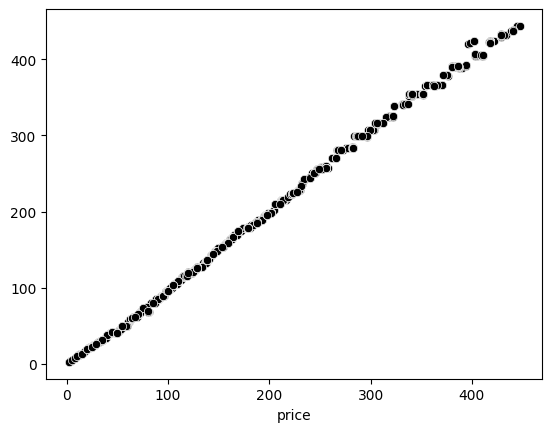

In [167]:
sns.scatterplot(x=y_test,y=xgb_y_test_pr,color='black')
plt.show()

In [175]:
imp_feature_xgb=xgb.feature_importances_
imp_feature_xgb
xgb_importance_df=pd.DataFrame({
    'feature':X.columns,
    'importance': imp_feature_xgb
})
xgb_importance_df.sort_values(by='importance',ascending=False,inplace=True)
xgb_importance_df

feature  importance
25             price_per_sqft    0.933652
22                  new_price    0.049845
23               price_binned    0.016044
24           price_per_person    0.000161
10               accommodates    0.000050
8               property_type    0.000045
1                   host_name    0.000035
6                    latitude    0.000033
0                     host_id    0.000027
19  review_scores_cleanliness    0.000027
18       review_scores_rating    0.000026
16           availability_365    0.000024
4                     zipcode    0.000014
17          number_of_reviews    0.000010
13                       beds    0.000008
9                   room_type    0.000000
2                        city    0.000000
3                       state    0.000000
5                     country    0.000000
7                   longitude    0.000000
11                  bathrooms    0.000000
14                   bed_type    0.000000
15                square_feet    0.000000
12                   bedrooms    0.000000
20     review_scores_location    0.000000
21        review_scores_value    0.000000
26       average_review_score    0.000000
27          availability_rate    0.000000

In [ ]:
#a. Comparison on the performance of each model using training, validation and test data


In [ ]:
data = {
 "Training R2 score": ["86%", "94%", "87%"],
 "Test R2 score": ["87%", "82%", "87%"],
 }
 result = pd.DataFrame(data)
 result.index = ["Linear Regression", "Decision Tree", "Random Forest"]
 resul

#4. Evaluation
#b. Comments on insights & recommendations

insights
Prices vary wildly: Some places cost a lot more than others, depending on things like how big they are, what kind of room it is (whole place or just a room), and where they are located.

Good reviews are super important: People are more likely to book places with good reviews about cleanliness, location, and value.

location: Places in nice areas usually cost more and get booked more often.

Things change with the seasons: How many days a place is available and how much it costs can change depending on the time of year.

recommendations


- Smart pricing: Change prices based on how popular the place is, the time of year, and what other similar places are charging.
- Keep guests happy: Make sure the place is clean, in a good location, and offer good value for the price.
- Use data to our advantage: Look closely at the data to figure out what makes a place popular and how to price it right.
- Target the right people: Focus on reaching out to people who are most likely to book, and offer deals during times when there might be less demand.

